## Question 1

Select two datasets and create a user defined function in Python that leverages the fundamental features of the Python without using Pandas built in functions such as 

numeric_df =df.select_dtypes(include=['number']

categorical_df = df.select_dtypes(exclude=['number']

Your function should accept a Data Frame as input and categorize its columns into numeric and categorical types, then display the lists of numeric and categorical columns. Include a section in your report where you discuss your interpretation of this task and its significance within the field of artificial intelligence and make sure to run the code and attach a screenshot of your machine in the appendix of your report. 


In [68]:
def categorize_columns(dataset):
    num_cols = []  # List to store names of numeric columns
    cat_cols = []  # List to store names of categorical columns

    print(f"Analyzing columns for dataset: {list(dataset.keys())}")  # Print the column names of the input dataset

    for column in dataset.keys():  # This will iterate over each column in the dataset
        is_numeric = True  # Initialize keep track if the column is numeric or not
        num_values = []  # Creat a list to store numeric values in the column
        cat_values = []  # Create to store categorical values in the column
        print(f"\nChecking column '{column}':")  # Print the name of the column being checked

        for value in dataset[column]:  # This will iterate over each value in the column
            if isinstance(value, int):  # Chek if the value passed is an integer
                num_values.append(value)  # This will append numeric value to numerical values list
                print(f"Value '{value}' is numeric.")  # Print that the value is numeric
            else:
                cat_values.append(value)  # Append non-numeric value to categorical values list
                print(f"Value '{value}' is not numeric.")  # This will print that the value is not numeric

        # Check if the column is purely numeric, purely categorical, or a mixture using if, else & elif statements
        if num_values and not cat_values:  # If num_values is not empty and cat_values is empty
            num_cols.append(column)  # Column is numeric, append to num_cols
            print(f"Column '{column}' is numeric.")  # Print that the column is numeric
        elif cat_values and not num_values:  # If cat_values is not empty and num_values is empty
            cat_cols.append(column)  # Column is categorical, append to cat_cols
            print(f"Column '{column}' is categorical.")  # Print that the column is categorical
        else:  # If both num_values and cat_values are not empty
            print(f"Column '{column}' contains a mixture of numeric and categorical values.")  # Print that the column contains a mixture
            num_cols.append(column)  # Append column to num_cols
            cat_cols.append(column)  # Append column to cat_cols

    print("\nNumeric columns:", num_cols)  # Print the list of numeric columns
    print("Categorical columns:", cat_cols)  # Print the list of categorical columns

    return num_cols, cat_cols  # Return lists of numeric and categorical column names


In [70]:
# Creating two sample datasets, each with one column
dataset1 = {'A': [1, 2, 3, 4, 5]}  # Dataset with a single numeric column
dataset2 = {'B': ['apple', 'banana', 'cherry', 'date', 'elderberry']}  # Dataset with a single categorical column

# Call the function for each dataset
num_cols1, cat_cols1 = categorize_columns(dataset1)  # Categorize columns in dataset1
num_cols2, cat_cols2 = categorize_columns(dataset2)  # Categorize columns in dataset2

Analyzing columns for dataset: ['A']

Checking column 'A':
Value '1' is numeric.
Value '2' is numeric.
Value '3' is numeric.
Value '4' is numeric.
Value '5' is numeric.
Column 'A' is numeric.

Numeric columns: ['A']
Categorical columns: []
Analyzing columns for dataset: ['B']

Checking column 'B':
Value 'apple' is not numeric.
Value 'banana' is not numeric.
Value 'cherry' is not numeric.
Value 'date' is not numeric.
Value 'elderberry' is not numeric.
Column 'B' is categorical.

Numeric columns: []
Categorical columns: ['B']


## Q2 (15 marks)



Write a function, the function should achieve the following objectives:



In pandas:
- Concatenate the two datasets, which you have used in Question1,  along the rows.
- Remove any duplicate rows.
- Print the number of rows and columns in the resulting DataFrame.




In NumPy:
- Calculate the correlation matrix for all numeric columns.
- Identify the pair of columns with the highest correlation coefficient.
- Print the names of these columns along with their correlation coefficient.

Include a section in your report where you discuss your comprehension of this task and its relevance in the field of data pre-processing and analysis using pandas and NumPy libraries. Make sure to run the code and attach a screenshot of your machine in the appendix of your report.


In [367]:
import pandas as pd
import numpy as np

# Creating sample datasets from Question 1
dataset1 = {'A': [1.2, 2.5, 3.7, 4.1, 5.3], 'E': [10.5, 20.2, 30.8, 40.1, 50.6]}
dataset2 = {'B': ['apple', 'banana', 'cherry', 'date', 'elderberry']}

# Additional datasets with duplicate entries
dataset3 = {'C': [10.2, 20.7, 30.1, 10.2, 20.7]}
dataset4 = {'D': ['red', 'green', 'blue', 'red', 'green']}

def concatenate_and_analyze(data1, data2, data3, data4):
    # Convert dictionaries to DataFrames
    df1 = pd.DataFrame.from_dict(data1, orient='columns')
    df2 = pd.DataFrame.from_dict(data2, orient='columns')
    df3 = pd.DataFrame.from_dict(data3, orient='columns')
    df4 = pd.DataFrame.from_dict(data4, orient='columns')

    # Pandas operations
    print("Pandas operations:")
    print("-------------------")

    # Concatenate the four DataFrames along columns
    df_concat = pd.concat([df1, df2, df3, df4], axis=1)
    print("Concatenated DataFrame:")
    print(df_concat)

    # Remove duplicate rows
    df_concat.drop_duplicates(inplace=True, keep=False)
    print("\nDataFrame after removing duplicates:")
    print(df_concat)

    # Print the number of rows and columns
    num_rows, num_cols = df_concat.shape
    print(f"\nNumber of rows: {num_rows}")
    print(f"Number of columns: {num_cols}")

    # NumPy operations
    print("\nNumPy operations:")
    print("------------------")

    # Convert DataFrame to NumPy array for numeric columns
    numeric_cols = df_concat.select_dtypes(include=[np.number]).columns
    numeric_data = df_concat[numeric_cols].to_numpy()

    # Calculate correlation matrix
    if len(numeric_data) > 0:
        corr_matrix = np.corrcoef(numeric_data.T)
        print("Correlation matrix:")
        print(corr_matrix)

        # Find pair of columns with highest correlation
        num_cols = len(numeric_cols)
        max_corr = 0
        max_cols = None

        for i in range(num_cols):
            for j in range(i + 1, num_cols):
                corr_coef = corr_matrix[i, j]
                if corr_coef > max_corr:
                    max_corr = corr_coef
                    max_cols = (numeric_cols[i], numeric_cols[j])

        # Print the pair of columns with highest correlation
        print(f"\nColumns with highest correlation: {max_cols}")
        print(f"Correlation coefficient: {max_corr}")
    else:
        print("No numeric columns found in the DataFrame.")

# Call the function with the sample datasets
concatenate_and_analyze(dataset1, dataset2, dataset3, dataset4)



Pandas operations:
-------------------
Concatenated DataFrame:
     A     E           B     C      D
0  1.2  10.5       apple  10.2    red
1  2.5  20.2      banana  20.7  green
2  3.7  30.8      cherry  30.1   blue
3  4.1  40.1        date  10.2    red
4  5.3  50.6  elderberry  20.7  green

DataFrame after removing duplicates:
     A     E           B     C      D
0  1.2  10.5       apple  10.2    red
1  2.5  20.2      banana  20.7  green
2  3.7  30.8      cherry  30.1   blue
3  4.1  40.1        date  10.2    red
4  5.3  50.6  elderberry  20.7  green

Number of rows: 5
Number of columns: 5

NumPy operations:
------------------
Correlation matrix:
[[1.         0.98978573 0.34388804]
 [0.98978573 1.         0.20941052]
 [0.34388804 0.20941052 1.        ]]

Columns with highest correlation: ('A', 'E')
Correlation coefficient: 0.9897857278385591


## Q3 (10 marks)


Writ a python program to implement the below algorithm:

- Create a NumPy array with 1000 random elements (numbers) and take the mean of every 5 sample window. 
- [datamean]  < -- mean ( [ numpy_array (1 : 5 : end ) ] )
- [data]min < -- min ( [ datamean ] )
- [data]max < -- max ( [ datamean ] )
- [ value ] max < -- max ( abs ( [data]max),  abs([ [data]min])

Include a section in your report  where you discuss your interpretation and significance of this task and make sure to run the code and attach a screenshot of your machine in the appendix of your report.


In [94]:
import numpy as np

# Creating a NumPy array that generates 1000 random elements
np_array = np.random.rand(1000)


print("Original NumPy array:")
print(np_array)


Original NumPy array:
[5.52297526e-01 1.06946777e-01 8.95418492e-01 3.14449819e-01
 9.58660642e-01 8.63789251e-01 8.56038208e-01 9.66464976e-03
 8.48197886e-02 3.07284774e-01 8.05233256e-01 9.21693851e-01
 2.00966784e-01 1.93783122e-01 7.86297833e-01 9.96180922e-01
 2.75977627e-02 3.12271745e-01 6.54146305e-02 4.52000381e-01
 1.34165346e-01 7.68983083e-01 4.88349117e-01 8.98299749e-01
 3.29411884e-01 5.17790384e-02 4.39897421e-01 5.60606173e-01
 1.85500353e-01 1.17916961e-01 3.11615313e-01 4.02306844e-01
 9.90548809e-02 1.87562349e-01 4.46001406e-02 2.07091096e-01
 6.97591291e-01 6.80202154e-01 9.48708608e-01 2.14965906e-01
 5.88110944e-03 5.04412792e-01 3.49140045e-01 3.85536397e-01
 2.89082546e-01 2.96984696e-01 4.08832369e-01 2.36768207e-01
 1.97406093e-01 8.73327546e-01 7.78844202e-01 6.28266631e-01
 4.37234741e-01 1.61315708e-01 7.47561296e-01 7.78707348e-01
 7.04395875e-01 7.07502428e-01 4.30212947e-01 9.36080679e-01
 1.46449224e-01 4.86127429e-01 5.14418068e-01 3.79649266e-01
 5

In [98]:
# Take the mean of every 5 sample window
data_mean = [np_array[i:i+5].mean() for i in range(0, len(np_array), 5)]
data_mean = np.array(data_mean)


In [100]:
print("\nMean of every 5 sample window:")
print(data_mean)


Mean of every 5 sample window:
[0.56555465 0.42431933 0.58159497 0.37069309 0.52384184 0.27113999
 0.20902791 0.54971181 0.30681058 0.40266378 0.55064452 0.71137986
 0.31678374 0.57002397 0.5220035  0.31017843 0.6267987  0.28536244
 0.33022764 0.64276769 0.19309051 0.5129312  0.58759276 0.373412
 0.6216543  0.54875638 0.63270798 0.41801454 0.39060638 0.39114665
 0.68039818 0.48849164 0.2839682  0.41267185 0.42073067 0.60396937
 0.57137476 0.60497522 0.67764101 0.36481991 0.47048858 0.54845939
 0.3874521  0.64644018 0.72843096 0.55234333 0.47189498 0.65039103
 0.25099251 0.46697675 0.3583523  0.38257449 0.59282927 0.55696618
 0.45157702 0.41232313 0.54519334 0.74523587 0.35576041 0.50817069
 0.5261481  0.63740883 0.53989423 0.41861478 0.40953171 0.79108035
 0.48275011 0.52649025 0.6928264  0.35813323 0.36054774 0.50974686
 0.44023429 0.46272498 0.57781001 0.52766246 0.44432239 0.37216546
 0.37213375 0.56859721 0.56580119 0.60613004 0.39565822 0.26715271
 0.36920167 0.85195071 0.6708153

In [102]:
# Calculate [data]min
data_min = data_mean.min()


In [104]:
# Calculate [data]max
data_max = data_mean.max()


In [106]:
# Calculate [value]max
value_max = max(abs(data_max), abs(data_min))

In [108]:
print(f"\n[data]min: {data_min}")
print(f"[data]max: {data_max}")
print(f"[value]max: {value_max}")



[data]min: 0.14392186019266398
[data]max: 0.8519507062415503
[value]max: 0.8519507062415503


# Q4

Write a code for database integration and manipulating the data using SQL clause. Explain the significance of RDBMS such as SQL in the field of artificial intelligence (AI). Discuss why they are essential for tasks such as data storage, retrieval, pre-processing, and integration in AI applications. Describe the process of connecting to a MySQL database, creating tables, and storing values. Highlight how proficient utilization of databases and SQL enhances the efficiency and effectiveness of AI systems. Make sure to run the code and attach a screenshot of your machine in the appendix of your report.       

In [261]:
import mysql.connector

# Connecting from the server
conn = mysql.connector.connect(
    user='root',
    host='127.0.0.1',
    port='3306',
    password='XXX', # Submitting with fake password as this is one I use for a lot of devices
    database='prog4ai_q4'
)

print(conn)

# Create a cursor object
cursor = conn.cursor()

# Create a table
cursor.execute("CREATE TABLE IF NOT EXISTS employees (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255), age INT, salary FLOAT)")
print("Table created successfully.")

# Insert data into the table
sql = "INSERT INTO employees (name, age, salary) VALUES (%s, %s, %s)"
values = [
    ("John Doe", 32, 50000.0),
    ("Jane Smith", 28, 65000.0),
    ("Bob Johnson", 45, 75000.0)
]

cursor.executemany(sql, values)
conn.commit()  

# Commit the changes to the database

print(f"{cursor.rowcount} records inserted.")




Table created successfully.
3 records inserted.


In [263]:
# Update a record
cursor.execute("UPDATE employees SET salary = 0000.0 WHERE id = 60")
conn.commit()  # Commit the changes to the database
print("Record updated successfully.")

Record updated successfully.


In [265]:
# Delete a record
cursor.execute("DELETE FROM employees WHERE id = 62")
cursor.execute("DELETE FROM employees WHERE id = 63")
conn.commit()  # Commit the changes to the database
print("Record deleted successfully.")


Record deleted successfully.


In [267]:
# Query the table & perfomrs table updates in Jupyter 
cursor.execute("SELECT * FROM employees")
result = cursor.fetchall()


In [259]:
# Print the results
print("\nAll employees:")
for row in result:
    print(row)



All employees:
(1, 'John Doe', 32, 50000.0)
(2, 'Jane Smith', 28, 60000.0)
(4, 'John Doe', 32, 50000.0)
(5, 'Jane Smith', 28, 65000.0)
(6, 'Bob Johnson', 45, 75000.0)
(7, 'John Doe', 32, 50000.0)
(8, 'Jane Smith', 28, 65000.0)
(9, 'Bob Johnson', 45, 75000.0)
(10, 'John', 37, 50500.0)
(11, 'Jane', 22, 60000.5)
(12, 'Mary', 48, 77001.0)
(13, 'John', 37, 50500.0)
(14, 'Jane', 22, 60000.5)
(15, 'Mary', 48, 77001.0)
(16, 'John', 37, 50500.0)
(17, 'Jane', 22, 60000.5)
(18, 'Mary', 48, 77001.0)
(19, 'John', 37, 50500.0)
(20, 'Jane', 22, 60000.5)
(21, 'Mary', 48, 77001.0)
(22, 'John', 37, 50500.0)
(23, 'Jane', 22, 60000.5)
(24, 'Mary', 48, 77001.0)
(25, 'John', 37, 50500.0)
(26, 'Jane', 22, 60000.5)
(27, 'Mary', 48, 77001.0)
(28, 'John', 37, 50500.0)
(29, 'Jane', 22, 60000.5)
(30, 'Mary', 48, 77001.0)
(31, 'John', 37, 50500.0)
(32, 'Jane', 22, 60000.5)
(33, 'Mary', 48, 77001.0)
(34, 'John', 37, 50500.0)
(35, 'Jane', 22, 60000.5)
(36, 'Mary', 48, 77001.0)
(37, 'John Doe', 32, 50000.0)
(38, 'Ja

In [269]:
# Close the cursor and database connection
cursor.close()
conn.close()


# Q5

Conduct an exploratory data analysis (EDA) on the Iris dataset from scikit learn using Python. The objective is to provide a comprehensive overview of the dataset, including an examination of its features and target variables, as well as understanding the data structure—specifically its shape, data types, and any missing values. The analysis should include descriptive statistics for each feature, along with visualizations such as histograms and boxplots to explore feature distributions and relationships among the species. Additionally, a correlation matrix should be generated to identify significant correlations between features. Finally, the report should include interpretations and conclusions drawn from the analyses and visualizations, effectively summarizing insights gained from the EDA process. Make sure to run the code and attach a screenshot of your machine in the appendix of your report.

In [339]:
# import libraries & datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [341]:
# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=feature_names)
df['species'] = [target_names[i] for i in target]  # Add species column


# Explore the data structure
print("Shape of the dataset:", df.shape)  # Print the number of rows and columns
print("\nData types of the features:")
print(df.info())  # Print information about the DataFrame, including data types


Shape of the dataset: (150, 5)

Data types of the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [343]:
# Check for missing values by summing the null values in each column
print("\nMissing values in the dataset:")
print(df.isnull().sum()) 


Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [345]:
# Check for duplicate instances
print("\nNumber of duplicate instances:", df.duplicated().sum())  # Count duplicate rows



Number of duplicate instances: 1


In [347]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())  # Calculate summary statistics for numerical columns



Descriptive statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [349]:
# Unique values of the target variable
print("\nUnique species:")
print(df['species'].unique())  # Print the unique values of the 'species' column


Unique species:
['setosa' 'versicolor' 'virginica']


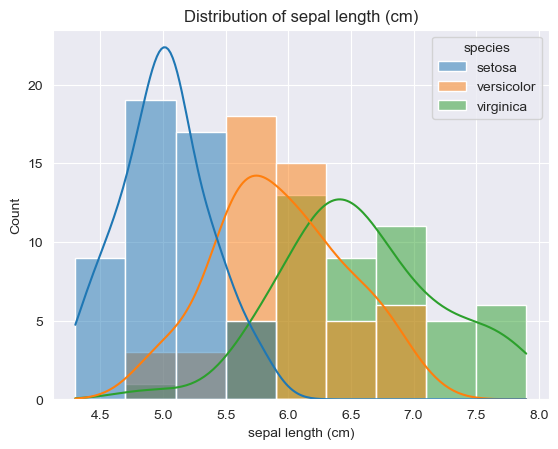

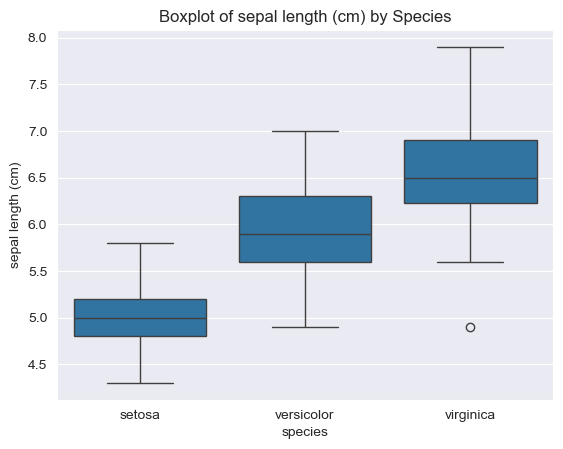

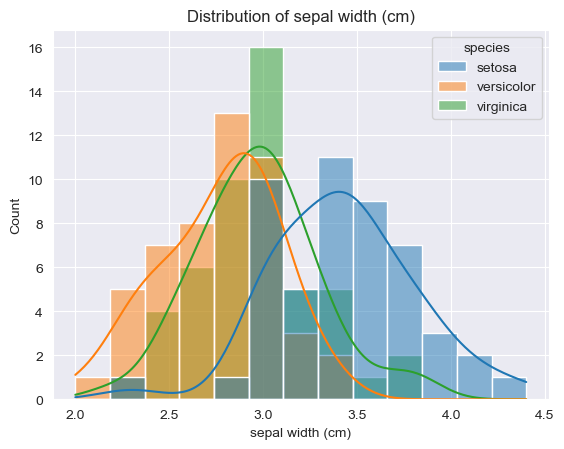

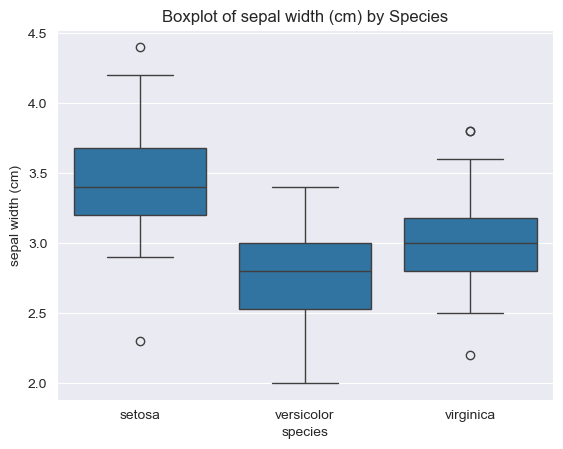

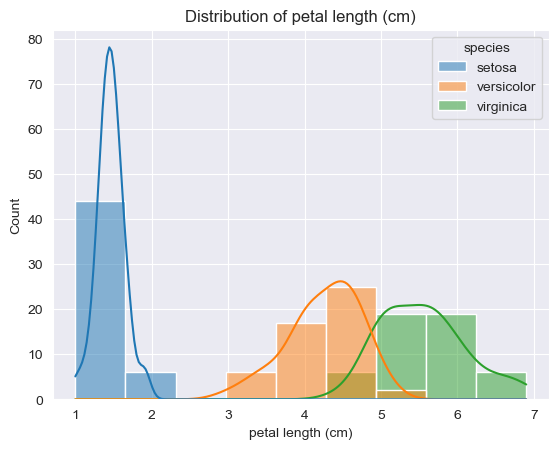

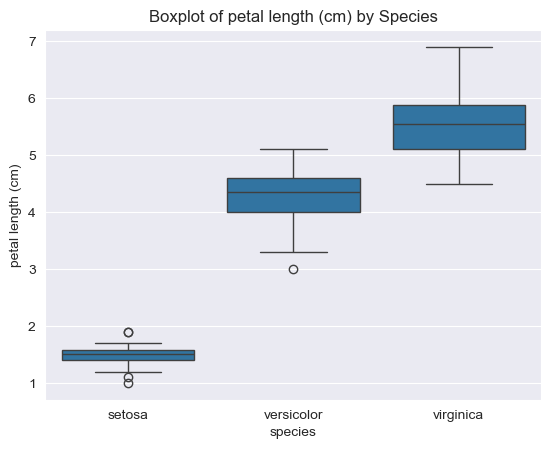

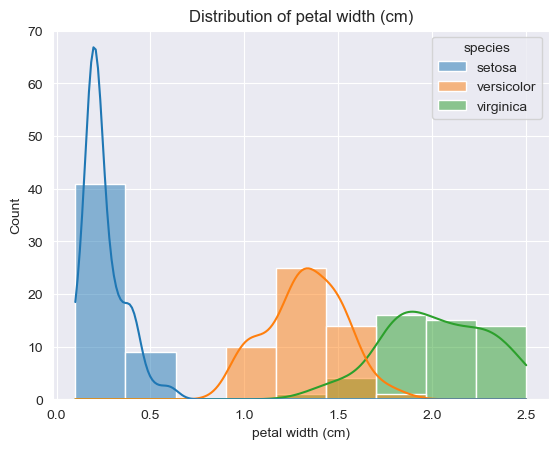

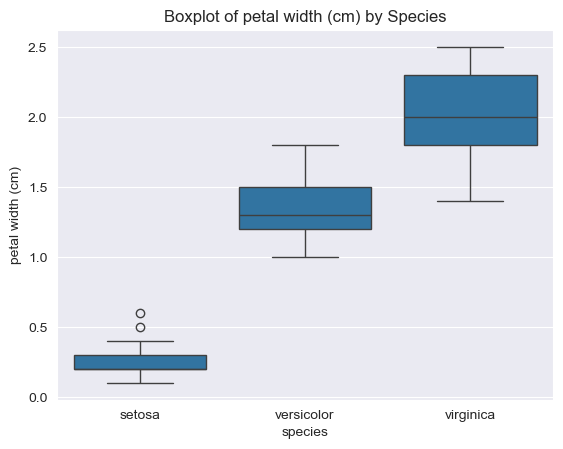

In [361]:
# Set Seaborn style
sns.set_style("darkgrid")  # Set the Seaborn style for better visualizations

# Visualize feature distributions
for feature in feature_names:
    plt.figure()  # Create a new figure for each plot
    sns.histplot(data=df, x=feature, kde=True, hue='species')  # Plot histogram with KDE and colored by species
    plt.title(f"Distribution of {feature}")
    plt.savefig('sample_plot.png')
    plt.show()

    plt.figure()  # Create a new figure for each plot
    sns.boxplot(data=df, x='species', y=feature)  # Plot boxplot of feature values grouped by species
    plt.title(f"Boxplot of {feature} by Species")
    plt.show()



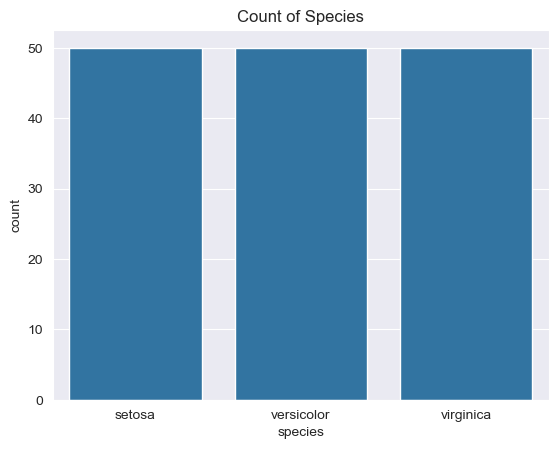

In [353]:
# Count plot of species
plt.figure()
sns.countplot(data=df, x='species')  # Plot a count plot of the 'species' column
plt.title("Count of Species")
plt.show()



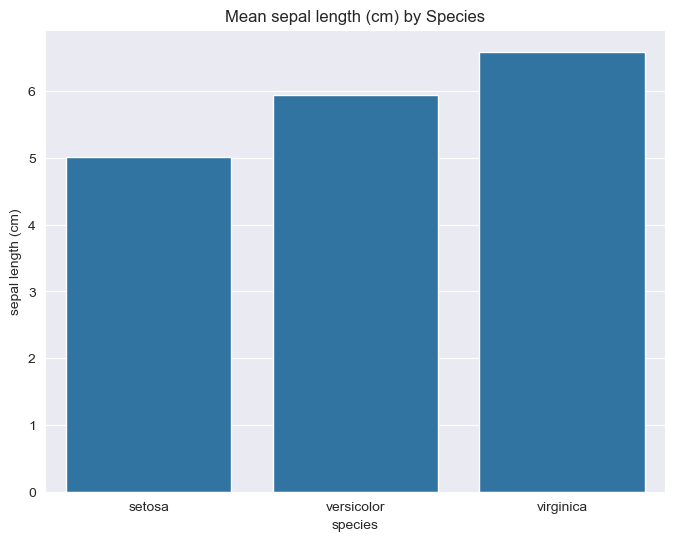

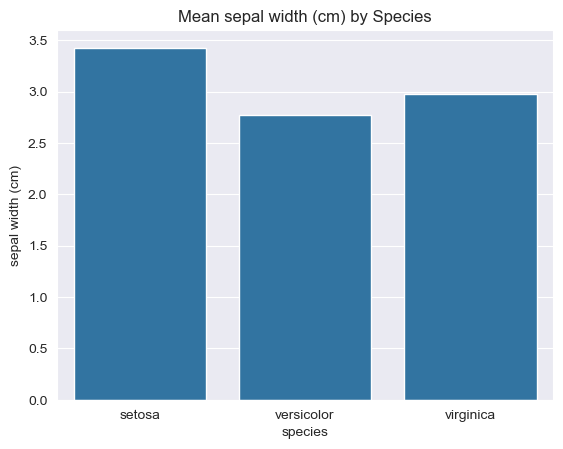

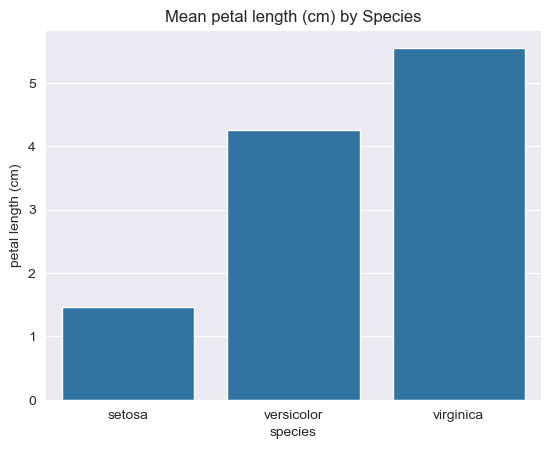

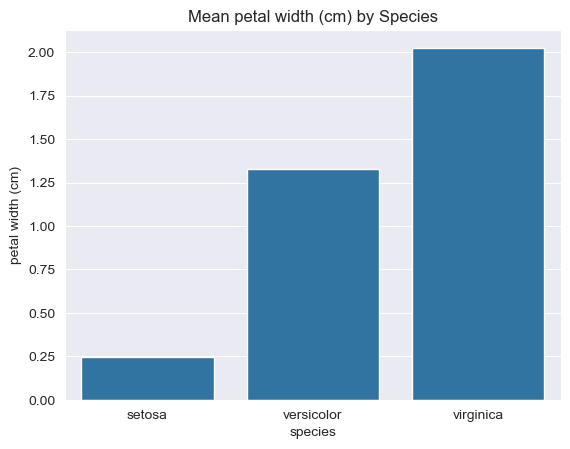

In [355]:
# Group data by species and plot mean values
grouped = df.groupby('species')[feature_names].mean().reset_index()  # Group data by species and calculate mean values
plt.figure(figsize=(8, 6))
for feature in feature_names:
    sns.barplot(data=grouped, x='species', y=feature)  # Plot a bar chart of mean feature values grouped by species
    plt.title(f"Mean {feature} by Species")
    plt.show()



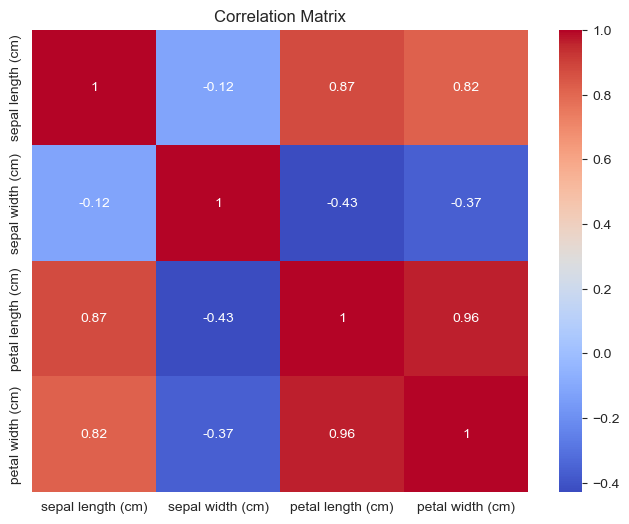

In [337]:
# Generate correlation matrix
corr_matrix = df[feature_names].corr()  # Calculate correlation matrix for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Plot a heatmap of the correlation matrix
plt.title("Correlation Matrix")
plt.show()
